<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-colabs/blob/main/Elaine_Gatto_Estatistica_Probabilidade_Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística - Probabilidade e Amostragem

# Desafio Final

Considerando a base de dados de populacao_brasileira.json responda as questões abaixo (os dados são fictícios). Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:



## ANÁLISE DO DATAFRAME

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import math
from statsmodels.stats.proportion import proportion_confint
from scipy.special import comb

In [ ]:
# abrindo o arquivo
from google.colab import drive
drive.mount('/content/drive')
popBra = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/populacao_brasileira.csv')
popBra.head(5)



---


**Número total de instâncias e atributos**

In [ ]:
print("\n@===========================================================@")
print(f"\n Número total de instâncias (linhas/pessoas): '{popBra.shape[0]}' ")
print(f"\n Número total de atributos (colunas/características): '{popBra.shape[1]}' ")
print("\n@===========================================================@")


@===========================================================@

 Número total de instâncias (linhas/pessoas): '1000' 

 Número total de atributos (colunas/características): '7' 

@===========================================================@




---


**Usando LEN o resultado é o mesmo:**

In [ ]:
total_pessoas = len(popBra)

print("\n@===========================================================@")
print(f"\n Número total de pessoas: {total_pessoas}. ")
print("\n@===========================================================@")


@===========================================================@

 Número total de pessoas: 1000. 

@===========================================================@




---


**Tipo dos dados**

In [ ]:
popBra.dtypes

,0
Unnamed: 0,int64
estado,object
idade,int64
escolaridade,object
nível de proficiência em inglês,object
renda,float64
sexo,object




---


**Calculando valores faltantes**

In [ ]:
popBra.isna().sum()

,0
Unnamed: 0,0
estado,0
idade,0
escolaridade,0
nível de proficiência em inglês,0
renda,0
sexo,0




---


**Informação estatística básica**

In [ ]:
popBra.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000




---


**Verificando os nomes das colunas**

In [ ]:
popBra.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')



---


**Vou mudar o nome da coluna "nível de proficiência em inglês" pq é um nome muito longo e vai ficar ruim nos gráficos!**

In [ ]:
popBra.rename(columns={'nível de proficiência em inglês': 'nivel_ingles'}, inplace=True)
popBra.head(10)

,Unnamed: 0,estado,idade,escolaridade,nivel_ingles,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
6,6,DF,56,Médio,Intermediário,528.36,F
7,7,DF,36,Superior,Avançado,2203.10,F
8,8,PI,40,Fundamental,Básico,3577.07,F
9,9,AP,28,Superior,Avançado,2796.95,M




---


**Verificando os nomes das linhas**

In [ ]:
popBra.index

RangeIndex(start=0, stop=1000, step=1)



---


**Agora quero saber todos os valores que existem em cada coluna categórica**

In [ ]:
colunas_categoricas = popBra.select_dtypes(include=['object']).columns
for coluna in colunas_categoricas:
    valores_unicos = popBra[coluna].unique()
    print(f"\n| '{coluna}': {valores_unicos}")


| 'estado': ['MA' 'BA' 'AM' 'CE' 'SE' 'DF' 'PI' 'AP' 'AC' 'SC' 'SP' 'GO' 'RO' 'PA'
 'MS' 'RN' 'RS' 'RR' 'PR' 'MG' 'MT' 'TO' 'PB' 'PE' 'RJ' 'AL' 'ES']

| 'escolaridade': ['Fundamental' 'Superior' 'Médio' 'Pós-graduação']

| 'nivel_ingles': ['Intermediário' 'Básico' 'Avançado']

| 'sexo': ['F' 'M']




---


## QUESTÃO 1

Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

Para calcular a probabilidade complementar de uma pessoa escolhida aleatoriamente não ser fluente em inglês, dado que fluente é definido como alguém com nível avançado, posso fazer da seguinte forma:

*Dados:*
- Total de pessoas fluentes em inglês com nível avançado = 344
- Total de pessoas = 1000

1. Calcular a Probabilidade de Ser Fluente:

   A probabilidade de uma pessoa escolhida aleatoriamente ser fluente em inglês é dada por:   
   

   $$
   P(\text{Fluente}) = \frac{\text{Número de pessoas fluentes}}{\text{Número total de pessoas}} = \frac{344}{1000} = 0.344
   $$


2. Calcular a Probabilidade Complementar:

   A probabilidade complementar é a probabilidade de uma pessoa **não** ser fluente em inglês. Ela é dada por:

  $$  
  P(\text{Não Fluente}) = 1 - P(\text{Fluente})
  $$
  $$
  P(\text{Não Fluente}) = 1 - 0.344 = 0.656
  $$
  $$
  P(\text{Não Fluente}) \times 100 = 0.656 \times 100 = 65.6\%
  $$


*Resposta:*

A probabilidade de escolhermos uma pessoa aleatória e ela **não** ser fluente em inglês é **65.6%**.

In [ ]:
# Pessoas fluentes em inglês
pessoas_fluentes = popBra.loc[popBra['nivel_ingles'] == 'Avançado']
total_fluentes = int(pessoas_fluentes.shape[0])
porcentagem_pf = total_fluentes / total_pessoas

print("\n@===========================================================@")
print(f"\n Total de pessoas fluentes em inglês: {total_fluentes}.")
print(f"\n Porcentagem de pessoas fluentes em inglês: {porcentagem_pf:.2%}")
print("\n@===========================================================@")



---


**Calculando o total de pessoas não fluentes em inglês**

In [ ]:
pessoas_nao_fluentes = popBra.loc[popBra['nivel_ingles'] != 'Avançado']
total_nao_fluentes = int(pessoas_nao_fluentes.shape[0])
porcentagem_pnf = total_nao_fluentes / total_pessoas

print("\n@===========================================================@")
print(f"\n Total de pessoas não fluentes em inglês: {total_nao_fluentes}.")
print(f"\n Porcentagem de pessoas fluentes em inglês: {porcentagem_pnf:.2%}")

print("\n@===========================================================@")



---


**Calculando a probabilidade complementar, que na verdade é igual ao que fiz na célula anterior, mas agora usando a fórmula de probabilidade complementar.**

In [ ]:
prob_fluente = total_fluentes / total_pessoas
prob_nao_fluente = 1 - prob_fluente

print("\n@=======================================================================================================@")
print(f'\n A probabilidade de uma pessoa não ser fluente em inglês é de {prob_nao_fluente:.2%}')
print(f'\n OU: A probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês é de {prob_nao_fluente:.2%}')
print("\n@=======================================================================================================@")



---


## QUESTÃO 2

Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

Para calcular a probabilidade de uma pessoa escolhida aleatoriamente de Alagoas ou do Pará ter uma renda superior a 5 mil reais, temos de usar a fórmula da probabilidade a seguir

$$P(\text{Renda} > 5000 | \text{Alagoas ou Pará}) = \frac{\text{Número de pessoas de Alagoas ou Pará com renda > 5000}}{\text{Número total de pessoas de Alagoas ou Pará}}$$

*Dados:*
- Total de pessoas de Alagoas ou Pará = 79
- Total de pessoas de Alagoas ou Pará com renda superior a 5 mil reais = 4

*Cálculo:*

$$P(\text{Renda} > 5000 | \text{Alagoas ou Pará}) = \frac{4}{79} \approx 0.0506 = 0.0506 \times 100 \approx 5.06\%$$

*Resposta:*

A probabilidade de uma pessoa escolhida aleatoriamente de Alagoas ou do Pará ter uma renda superior a 5 mil reais é aproximadamente **5.06%**.


In [ ]:
pessoas_alagoas = popBra.loc[popBra['estado'] == 'AL']
total_alagoas = int(pessoas_alagoas.shape[0])
porcentagem_alagoas = total_alagoas / total_pessoas

print("\n@===========================================================@")
print(f"\n Total de pessoas do estado de Alagoas: {total_alagoas}.")
print(f"\n Porcentagem de pessoas do Alagoas: {porcentagem_alagoas:.2%}")
print("\n@===========================================================@")

In [ ]:
pessoas_para = popBra.loc[popBra['estado'] == 'PA']
total_para = int(pessoas_para.shape[0])
porcentagem_para = total_para / total_pessoas

print("\n@===========================================================@")
print(f"\n Total de pessoas do estado do Pará: {total_para}.")
print(f"\n Porcentagem de pessoas do Pará: {porcentagem_para:.2%}")
print("\n@===========================================================@")

In [ ]:
pessoas_alagoas_ou_para = (popBra[(popBra['estado'] == 'AL') | (popBra['estado'] == 'PA')])
total_alagoas_ou_para = len(pessoas_alagoas_ou_para)
porcentagem_alagoas_ou_para = total_alagoas_ou_para / total_pessoas

print("\n@===========================================================@")
print(f"\n Total de pessoas do estado de Alagoas ou Pará: {total_alagoas_ou_para}.")
print(f"\n Porcentagem de pessoas do Alagoas ou do Pará: {porcentagem_alagoas_ou_para:.2%}")
print("\n@===========================================================@")



---


**Agora vamos ver a questão da renda!**

In [ ]:
alagoas_5k = pessoas_alagoas[pessoas_alagoas['renda']>=5000]
total_alagoas_5k = len(alagoas_5k)
porcentagem_alagoas_5k = total_alagoas_5k / 1000

print("\n@======================================================================@")
print(f"\n Total de pessoas do estado de com renda maior de R$ 5.000,00: {total_alagoas_5k}.")
print(f"\n Porcentagem de pessoas do com renda maior de R$ 5.000,00: {porcentagem_alagoas_5k:.2%}")
print("\n@======================================================================@")

In [ ]:
para_5k = pessoas_para[pessoas_para['renda']>5000]
total_para_5k = len(alagoas_5k)
porcentagem_para_5k = total_para_5k / total_pessoas

print("\n@======================================================================@")
print(f"\n Total de pessoas do estado do Pará com renda maior de R$ 5.000,00: {total_para_5k}.")
print(f"\n Porcentagem de pessoas do Pará com renda maior de R$ 5.000,00:  {porcentagem_para_5k:.2%}")
print("\n@======================================================================@")

In [ ]:
pessoas_renda_supra_5k = pessoas_alagoas_ou_para[pessoas_alagoas_ou_para['renda'] > 5000]
total_renda_5k = len(pessoas_renda_supra_5k)
probabilidade_renda_5k = total_renda_5k / total_alagoas_ou_para
porcentagem_para_5k = probabilidade_renda_5k

print("\n@=================================================================================================@")
print(f"\n Pessoas do Alagoas ou do Pará com renda  maior que R$ 5.000,00: {total_renda_5k}")
print(f"\n Probabilidade de pessoas do Alagoas ou do Pará com renda maior que R$ 5.000,00: {porcentagem_para_5k:.2%}")
print("\n@=================================================================================================@")



---

## QUESTÃO 3

Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

**RESOLUÇÃO**

Para calcular a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas e, especificamente, para determinar a probabilidade de a quinta pessoa que conversar comigo, que também é do Amazonas, ter ensino superior completo, farei o seguinte:

*Calcular a Probabilidade de uma Pessoa do Amazonas Ter Ensino Superior Completo:*

$$P(\text{Ensino Superior Completo | Amazonas}) = \frac{\text{Número de pessoas do Amazonas com ensino superior completo}}{\text{Número de pessoas do Amazonas}} = \frac{?}{?} = \frac{?}{?} \approx ?$$

*Probabilidade da Quinta Pessoa Ter Ensino Superior Completo*

Assumindo uma distribuição uniforme e aleatória, se estou conversando com uma pessoa aleatoriamente escolhida do Amazonas, a probabilidade de qualquer pessoa ter ensino superior completo é independente da posição. Portanto, a distribuição geométrica deve ser usada pois ela permite modelar a probabilidade de ter o primeiro sucesso em uma tentativa específica quando cada tentativa é independente e tem a mesma probabilidade de sucesso. Neste exercício, a distribuição geométrica pode ser usada para modelar a probabilidade de encontrar o primeiro amazonense com ensino superior completo na quinta tentativa.

$$P(X = k) = (1 - p)^{k-1} \cdot p$$

onde:
- $p$ é a probabilidade de sucesso em cada tentativa (a pessoa ter ensino superior completo).
- $k$ é o número de tentativas até o primeiro sucesso.

*Para a quinta pessoa $(k = 5)$:*

$$P(X = 5) = (1 - 0.3158)^{5-1} \cdot 0.3158$$

*Então*

a. Calcular $1 - p$

$$1 - p = 1 - 0.3158 = 0.6842$$

b. Elevar $1 - p$ à potência de $k-1$

$$0.6842^4 \approx 0.2150$$

c. Multiplicar pelo valor de $p$

$$P(X = 5) = 0.2150 \cdot 0.3158 \approx 0.0678$$

In [ ]:
pessoas_amazonas = popBra.loc[popBra['estado'] == 'AM']
total_amazonas = int(pessoas_amazonas.shape[0])
porcentagem_amazonas = round((total_amazonas / total_pessoas) * 100, 2)

print("\n@===========================================================@")
print(f"\n Total de pessoas do estado do Amazonas: {total_amazonas}.")
print(f"\n Porcentagem de pessoas do Amazonas: {porcentagem_amazonas:.2f}%")
print("\n@===========================================================@")

In [ ]:
amazonas_superior = pessoas_amazonas[(pessoas_amazonas['escolaridade'] == 'Superior') | (pessoas_amazonas['escolaridade'] == 'Pós-graduação')]
total_amazonas_superior = amazonas_superior.shape[0]
probabilidade_as = total_amazonas_superior / total_amazonas
#porcentagem_amazonas_superior = round((total_amazonas_superior / total_amazonas) * 100, 2)

print("\n@========================================================================================================@")
print(f"\n Total de pessoas do Amazonas com ensino superior incluindo pós-graduação: {total_amazonas_superior}.")
print(f"\n Probabilidade de pessoas do Amazonas com ensino superior incluindo pós-graduação: {probabilidade_as:.2%}")
print("\n@========================================================================================================@")

In [ ]:
# Número de tentativas até o primeiro sucesso
k = 5

# Distribuição geométrica
probabilidade_k_manual = (1 - probabilidade_as)**(k - 1) * probabilidade_as
probabilidade_k = stats.geom.pmf(k, probabilidade_as)

print("\n@================================================================================================@")
print(f"\n Probabilidade de pessoas do Amazonas com ensino superior incluindo pós-graduação: {probabilidade_k_manual:.2%}")
print(f"\n Probabilidade de pessoas do Amazonas com ensino superior incluindo pós-graduação: {probabilidade_k:.2%}")
print("\n@================================================================================================@")



---

## QUESTÃO 4

Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


*Resposta*

Para responder a esta questão manualmente, vou precisar analisar a distribuição da renda na sua base de dados e determinar a faixa de renda que contém a maioria das pessoas. A função densidade de probabilidade (PDF) descreve a probabilidade de uma variável contínua cair dentro de uma faixa específica de valores.

a. *Primeiro de tudo, preciso determinar faixas de renda. Um exemplo seria:*   
   - Faixa 1: Renda de R$ 0 a R$ 1.500
   - Faixa 2: Renda de R$ 1.501 a R$ 3.000
   - Faixa 3: Renda de R$ 3.001 a R$ 4.500
   - E assim por diante.

b. Depois, para cada faixa, cont quantas pessoas têm a renda dentro dessa faixa.

c. Em seguida, calcular a proporção de pessoas em cada faixa, que é a quantidade de pessoas na faixa dividida pelo total de pessoas (1000).

d. Dai que a faixa com a maior proporção de pessoas é aquela onde a maioria da população está.

e. Por fim, para uma variável contínua, a PDF é a função que descreve a densidade de probabilidade de um valor específico. Para uma distribuição empírica, pode-se aproximar a PDF usando a frequência relativa ou densidade da amostra.



In [ ]:
intervalo = 1500
faixas_renda = np.arange(0, popBra['renda'].max() + intervalo, intervalo)
faixas_renda

In [ ]:
contagem_por_faixa, _ = np.histogram(popBra['renda'], bins=faixas_renda)
contagem_por_faixa

In [ ]:
faixa_predominante = np.argmax(contagem_por_faixa) * intervalo
print("Faixa de renda predominante:", faixa_predominante, "-", faixa_predominante + intervalo)

In [ ]:
# Plotar o histograma usando Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=popBra, x='renda', bins=faixas_renda, kde=False,
             color='lightpink', edgecolor='black')

# Configurar título e rótulos
plt.title('Distribuição da Renda das Pessoas')
plt.xlabel('Renda')
plt.ylabel('Número de Pessoas')

# Ajustar os ticks do eixo x para mostrar as faixas de renda corretamente
plt.xticks(ticks=faixas_renda, labels=[f'{int(x)}' for x in faixas_renda], rotation=45)

# Adicionar grade para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.tight_layout()  # Ajusta automaticamente o layout para evitar sobreposição
plt.show()



---

## QUESTÃO 4

Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

Na verdade aqui o correto não é FAÇA A DISTRIBUIÇÃO NORMAL, mas sim, APLIQUE O MODELO DE DISTRIBUIÇÃO NORMAL. Existem muitos erros conceituais na escrita e isso complica muito a interpretação e resolução dos exercícios.

1. *Calcular a Média ($\mu$):*

   $$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$$

2. *Calcular a Variância ($\sigma^2$):*

   $$\sigma^2 = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \mu)^2$$

   Onde $N$ é o número total de observações, $x_i$ são os valores individuais da renda, e $\mu$ é a média calculada.

3. Por fim, ploto o histograma. A curva da distribuição normal é ajustada com base nos parâmetros estimados, permitindo visualizar como a distribuição dos dados se compara ao modelo de distribuição normal.

In [ ]:
# Remove valores ausentes, se houver
renda = popBra['renda'].dropna()
media_renda = renda.mean()

# ddof=1 para a variância amostral
variancia_renda = renda.var(ddof=1)

# Calcular o desvio padrão
desvio_padrao_renda = np.sqrt(variancia_renda)

# Mostrar resultados
print(f"Média da renda: {media_renda:.2f}")
print(f"Variância da renda: {variancia_renda:.2f}")
print(f"Desvio Padrão da renda: {desvio_padrao_renda:.2f}")

In [ ]:
# Plotar a distribuição normal
plt.figure(figsize=(12, 6))

# Plotar o histograma da renda
sns.histplot(renda, kde=False, bins=10, color='lightpink',
             edgecolor='black', stat='density')

# Adicionar a curva da distribuição normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_renda, desvio_padrao_renda)
#plt.plot(x, p, 'k', linewidth=2)
plt.plot(x, p, color='red', linewidth=2, alpha=0.7)

# Configurar título e rótulos
plt.title('Distribuição da Renda com Curva de Distribuição Normal Ajustada')
plt.xlabel('Renda')
plt.ylabel('Densidade')

# Adicionar grade para melhor visualização
plt.grid(axis='y', color='blue', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()



---

## QUESTÃO 6

Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

Precisamos encontrar a probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes. Para isso posso usar o modelo de distribuição binomial.

1. A probabilidade $p$ de uma pessoa ter pós-graduação é dada pela razão entre o número de pessoas com pós-graduação e o número total de pessoas no DataFrame, onde:

   - $N$: Número total de pessoas na amostra;
   - $N_{\text{pós-graduação}}$: Número de pessoas com pós-graduação;
   - A probabilidade \( p \) de uma pessoa ter pós-graduação é dada por:
   $$ p = \frac{N_{\text{pós-graduação}}}{N}$$




In [ ]:
pessoas_superior = popBra.loc[popBra['escolaridade'] == 'Superior']
total_superior = int(pessoas_superior.shape[0])
porcentagem_superior = round((total_superior / total_pessoas) * 100, 2)

print("\n@===========================================================@")
print(f"\n Total de pessoas com ensino superior: {total_superior}.")
print(f"\n Porcentagem de pessoas com ensino superior: {porcentagem_superior:.2f}%")
print("\n@===========================================================@")

In [ ]:
pessoas_pg = popBra.loc[popBra['escolaridade'] == 'Pós-graduação']
total_pg = int(pessoas_pg.shape[0])
porcentagem_pg = round((total_pg / total_pessoas) * 100, 2)

print("\n@===========================================================@")
print(f"\n Total de pessoas com pós-graduação: {total_pg}.")
print(f"\n Porcentagem de pessoas com pós-graduação: {porcentagem_pg:.2f}%")
print("\n@===========================================================@")

In [ ]:
pos = total_pg / total_pessoas

print("\n@===========================================================@")
print(f"\n Porcentagem de pessoas com pós-graduação é de: {pos:.2f}%")
print("\n@===========================================================@")

In [ ]:
n = 1000000
k = 243000

In [ ]:
prob_pos_grad = stats.binom.pmf(k, n, pos)
print(f'Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: {prob_pos_grad}')
print(f'Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: {prob_pos_grad:.10e}')
print(f'Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: {prob_pos_grad * 100:.10f}%')



---

## QUESTÃO 7

Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

*RESPOSTA*

Resolvendo manualmente a Função de Densidade Acumulada (CDF) para a Escolaridade.

1. Contar o número de pessoas em cada nível de escolaridade:
   - Ensino Fundamental
   - Ensino Médio
   - Superior
   - Pós-graduação

   Contagem para a nossa amostra:

  \begin{array}{|l|c|}
  \hline
  \text{Escolaridade} & \text{Número de pessoas (Frequência)} \\
  \hline
  \text{Ensino Fundamental} & 266 \\
  \text{Ensino Médio} & 253 \\
  \text{Superior} & 243 \\
  \text{Pós-graduação} & 238 \\
  \hline
  \textbf{Total} & \textbf{1000} \\
  \hline
  \end{array}



2. Calcular a probabilidade (densidade) para cada nível de escolaridade:
   
   Para isto, dividimos o número de pessoas em cada categoria pelo total de pessoas.

   $$P(\text{Fundamental}) = \frac{266}{1000} = 0.266$$

   $$P(\text{Médio}) = \frac{253}{1000} = 0.253$$
   
   $$P(\text{Superior}) = \frac{243}{1000} = 0.243$$
   
   $$P(\text{Pós-graduação}) = \frac{238}{1000} = 0.238$$

3. Somar as densidades para obter a densidade acumulada (CDF):

   Para cada nível de escolaridade, somamos a densidade acumulada dos níveis anteriores:
   
   $$\text{CDF}(\text{Fundamental}) = P(\text{Fundamental}) = 0.266$$
   
   $$\text{CDF}(\text{Médio}) = P(\text{Fundamental}) + P(\text{Médio}) = 0.266 + 0.253 = 0.519$$
   
   $$\text{CDF}(\text{Superior}) = 0.519 + 0.238 = 0.726$$

   $$\text{CDF}(\text{Pós-graduação}) = 0.762 + 0.238 = 1.00$$

   A função de densidade acumulada (CDF) para a escolaridade fica assim:
  
\begin{array}{|l|c|}  
\hline
\text{Escolaridade} & \text{Densidade Acumulada (CDF)} \\
\hline
\text{Ensino Fundamental} & 0.266 \\
\text{Ensino Médio} & 0.519 \\
\text{Superior} & 0.726 \\
\text{Pós-graduação} & 1.00 \\
\hline
\end{array}    

   Esse processo resulta em uma função de densidade acumulada discreta que vai de 0 até 1. Resultado final é:


\begin{array}{|l|c|c|c|}  
\hline
\text{Escolaridade} & \text{Frequência} & \text{Probabilidade} & \text{CDF}\\
\hline
\text{Ensino Fundamental} & 266 & 0.266 & 0.266 \\
\text{Ensino Médio} & 253 & 0.253 & 0.519 \\
\text{Superior} & 243 & 0.243 & 0.762 \\
\text{Pós-graduação} & 238 & 0.238 & 1.000 \\
\hline
\end{array}
  

*Resolução com Python*

1. Contar a frequência de cada nível de escolaridade.
2. Calcular a densidade de probabilidade.
3. Somar as densidades para criar a função de densidade acumulada.
4. Plotar o gráfico da CDF.




In [ ]:
escolaridade_frequencia = popBra['escolaridade'].value_counts()
escolaridade_frequencia = escolaridade_frequencia.reset_index()
escolaridade_frequencia.columns = ['escolaridade', 'frequência']

print("\nDataFrame com a frequência")
escolaridade_frequencia


DataFrame com a frequência


,escolaridade,frequência
0,Fundamental,266
1,Pós-graduação,253
2,Superior,243
3,Médio,238


In [ ]:
# Definir a ordem desejada das categorias
ordem_escolaridade = ['Fundamental', 'Médio', 'Superior', 'Pós-graduação']

# Converter a coluna 'Escolaridade' para tipo categórico com a ordem definida
escolaridade_frequencia['escolaridade'] = pd.Categorical(escolaridade_frequencia['escolaridade'], categories=ordem_escolaridade, ordered=True)

# Reordenar o DataFrame com base na ordem definida
escolaridade_frequencia = escolaridade_frequencia.sort_values('escolaridade')

print("\nDataFrame com a frequência ordenada:")
escolaridade_frequencia


DataFrame com a frequência ordenada:


,escolaridade,frequência
0,Fundamental,266
3,Médio,238
2,Superior,243
1,Pós-graduação,253


In [ ]:
escolaridade_frequencia['Proporção'] = escolaridade_frequencia['frequência'] / total_pessoas

print("\nDataFrame com a frequencia e a proporção de escolaridade:")
escolaridade_frequencia


DataFrame com a frequencia e a proporção de escolaridade:


,escolaridade,frequência,Proporção
0,Fundamental,266,0.266
3,Médio,238,0.238
2,Superior,243,0.243
1,Pós-graduação,253,0.253


In [ ]:
escolaridade_frequencia['CDF'] = escolaridade_frequencia['Proporção'].cumsum()

print("\nDataFrame com frequência, proporção e densidade acumulada:")
escolaridade_frequencia


DataFrame com frequência, proporção e densidade acumulada:


,escolaridade,frequência,Proporção,CDF
0,Fundamental,266,0.266,0.266
3,Médio,238,0.238,0.504
2,Superior,243,0.243,0.747
1,Pós-graduação,253,0.253,1.000


In [ ]:
k = 60    # Número de pessoas com renda superior
coef_binomial = comb(total_pessoas, probabilidade_superior)

# Calcular p^k
p_k = probabilidade_superior ** k

# Calcular (1 - p)^(n - k)
q = 1 - probabilidade_superior
q_n_k = q ** (n - k)

# Calcular a probabilidade
probabilidade_60_pessoas = coef_binomial * p_k * q_n_k

print(f"\n A probabilidade de encontrar exatamente 60 pessoas com renda superior a R$ 4082,54 é de : {probabilidade_60_pessoas}")
print("\n Há 117 zeros entre o ponto decimal e os primeiros dígitos significativos: 0.000…00018781362424028728")
print("\n Esse número é extremamente pequeno, indicando que é muito improvável encontrar exatamente"
    "\n 60 pessoas com uma renda superior a R$ 4082,54 em uma amostra de 1000 pessoas, dado que a"
    "\n probabilidade de qualquer pessoa ter uma renda superior a esse valor é de aproximadamente 15,87%.")

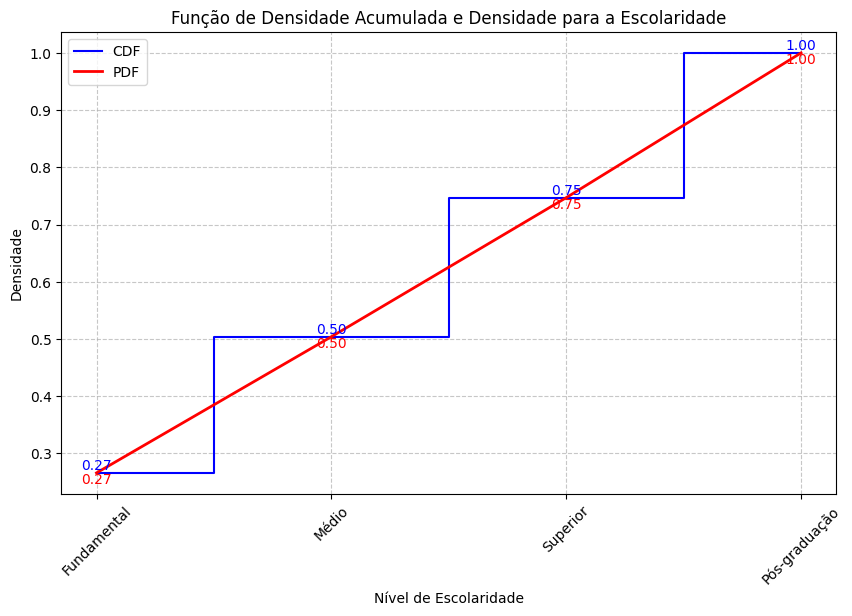

In [ ]:
plt.figure(figsize=(10, 6))

# Plotar a CDF com plt.step(), onde='mid' para centralizar os pontos
plt.step(escolaridade_frequencia['escolaridade'],
         escolaridade_frequencia['CDF'], where='mid', color='blue', label='CDF')

# Plotar a PDF (Densidade de Frequência) como linha contínua
plt.plot(escolaridade_frequencia['escolaridade'],
         escolaridade_frequencia['CDF'], color='red', label='PDF', linewidth=2)

# Adicionar valores da CDF e PDF nos respectivos pontos
for i in range(len(escolaridade_frequencia)):
    plt.text(escolaridade_frequencia['escolaridade'][i],
             escolaridade_frequencia['CDF'][i],
             f"{escolaridade_frequencia['CDF'][i]:.2f}", color='blue', ha='center', va='bottom')

    plt.text(escolaridade_frequencia['escolaridade'][i],
             escolaridade_frequencia['CDF'][i],
             f"{escolaridade_frequencia['CDF'][i]:.2f}", color='red', ha='center', va='top')

# Configurar título e rótulos
plt.title('Função de Densidade Acumulada e Densidade para a Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Densidade')

# Adicionar grade para melhor visualização
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Adicionar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()


In [ ]:
# Plotar o histograma da escolaridade
plt.figure(figsize=(10, 6))
sns.histplot(popBra['escolaridade'], discrete=True, stat='density',
             color='lightblue', edgecolor='black',
             bins=len(escolaridade_frequencia))

# Adicionar a curva da CDF
plt.step(escolaridade_frequencia['escolaridade'],
         escolaridade_frequencia['CDF'], where='mid', color='blue',
         label='CDF', linewidth=2)

# Configurar título e rótulos
plt.title('Distribuição e Função de Densidade Acumulada para a Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Densidade / CDF')

# Adicionar grade e legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Mostrar o gráfico
plt.xticks(rotation=45)
plt.show()




---


## QUESTÃO 8

Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

*RESPOSTA*

Para calcular a margem de erro amostral da proporção populacional, posso usar:

$$E = z \times \sqrt{\frac{p(1 - p)}{n}}$$

Onde:
  - $E$ é a margem de erro;
  - $z$ é o valor crítico correspondente ao nível de confiança desejado (por exemplo, $1,96$ para um intervalo de confiança de $95\%$);
  - $p$ é a proporção amostral (neste caso, a proporção de pessoas com nível de inglês intermediário);
  - $n$ é o tamanho da amostra.


a. Para um intervalo de confiança de $95%$, o valor de $z$ é 1,96. Outros valores de $z$ são usados para diferentes níveis de confiança (por exemplo, $1,64$ para 90\% e $2,58$ para 99\%).

b. $p$: é a proporção de pessoas com nível intermediário em inglês, que é de $32,90%$, o que corresponde a uma proporção amostral de $p = 0,329$

c. $n$: é o tamanho total da amostra que é $1000$.

d. Com uma amostra total de $1000$ pessoas e $32,90%$ delas com nível intermediário de inglês, temos que:

- $p = 0,329$
- $n = 1000$
- Para um nível de confiança de $95\%$, $z = 1,96$

Daí que:

$$E = 1,96 \times \sqrt{\frac{0,329 \times (1 - 0,329)}{1000}}$$

Dessa forma:

$$p(1 - p)$$

$$0,329 \times (1 - 0,329) = 0,329$$

$$0,329 \times 0,671 \approx 0,220$$

$$\frac{0,220}{1000} = 0,00022$$

$$\sqrt{0,00022} \approx 0,0148$$

$$E = 1,96 \times 0,0148 \approx 0,029$$


*Portanto, a margem de erro amostral é aproximadamente 0,029, ou 2,9%.*



In [ ]:
intermediario = popBra.loc[popBra['nivel_ingles'] == 'Intermediário']
total_intermediario = int(intermediario.shape[0])
porcentagem = total_intermediario / total_pessoas

print("\n@===========================================================@")
print(f"\n Total de pessoas com nível intermediário em inglês: {total_intermediario}.")
print(f"\n Porcentagem de pessoas fluentes em inglês: {porcentagem:.2%}")
print("\n@===========================================================@")

In [ ]:
p = porcentagem
n = total_pessoas
z = 1.96

# Calcular a margem de erro manualmente
def calcular_margem_erro(p, n, z):
    # Calcular a variância da proporção
    variancia = p * (1 - p) / n
    # Calcular a raiz quadrada da variância (erro padrão)
    erro_padrao = math.sqrt(variancia)
    # Calcular a margem de erro
    margem_erro = z * erro_padrao
    return margem_erro

margem_erro = calcular_margem_erro(p, n, z)

print("\n@===========================================================@")
print(f"\n Total de pessoas com nível intermediário em inglês: {total_intermediario}.")
print(f"\n Porcentagem de pessoas fluentes em inglês: {p:.2%}")
print(f"\n Margem de erro amostral: {margem_erro:.4f}, ou {margem_erro * 100:.2f}%")
print("\n@===========================================================@")



---


## QUESTÃO 9

Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

*RESPOSTA*

Para resolver a questão sobre a renda da população e a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média, você pode seguir os seguintes passos:

- Para calcular a renda média da população, você precisa da fórmula básica da média:

$$\text{Renda Média} = \frac{\text{Soma Total das Rendas}}{\text{Número de Pessoas}}$$

- Para calcular a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média, pode-se usar a distribuição normal se as condições forem apropriadas.

- Supondo que a renda da população siga uma distribuição normal:
- Média ($\mu$) da renda.
- Desvio padrão ($\sigma$) da renda.

- Se a distribuição da renda é normal e desejamos encontrar a probabilidade de que a renda de uma pessoa seja maior do que a média mais mil reais, podemos usar a fórmula de normalização para converter esse valor em um escore $z$:

$$z = \frac{X - \mu}{\sigma}$$

Onde:
+ $X$ é o valor de renda de interesse (média + mil reais).
+ $\mu$ é a média da renda.
+ $\sigma$ é o desvio padrão da renda.

Considerando que:
- Média da renda $\mu$ = 3082,54 reais.
- Desvio padrão $\sigma$ =  996,57 reais.
- Média + R$ 1.000,00 = 4082,54

Queremos encontrar a probabilidade de a renda ser maior que $\mu + 1000$ reais Calculamos, portanto, o escore $z$:
   
   $$z = \frac{X - \mu}{\sigma}$$
   
   $$z = \frac{4082,54 - 3082,54}{996,57}$$
   
   $$z = \frac{1000}{996,57} \approx 1,0036$$


Então, queremos encontrar a Probabilidade Acumulada para o Escore $z$. Para isso, usamos a tabela da distribuição normal padrão (tabela z), que fornece a probabilidade acumulada até um escore $z$.

**Passos para usar a tabela z:**

- Localizar o escore $z = 1,0036$ na tabela z. A maioria das tabelas fornecem valores até duas casas decimais, então podemos usar $z \approx 1,00$ para uma estimativa.

- Na tabela z, para $z = 1,00$, a probabilidade acumulada até esse ponto é aproximadamente $0,8413$. Dado que $1,0036$ é muito próximo de $1,00$, o valor será muito próximo de $0,8413$.

Agora podemos calcular a Probabilidade de Renda Superior ao Valor de Interesse. Assim, a probabilidade de uma renda ser maior do que $4082,54$ reais é a área à direita do escore $z$. Isso é calculado subtraindo a probabilidade acumulada de $1$:

$$P(X > 4082,54) = 1 - P(Z \leq 1,0036)$$

$$P(X > 4082,54) = 1 - 0,8413$$

$$P(X > 4082,54) \approx 0,1587$$

Portanto, a probabilidade de uma pessoa ter uma renda superior a $4082,54$ reais é aproximadamente $0,1587$ ou $15,87%$. O valor obtido de $0,1578$ está muito próximo, e a pequena diferença pode ser devido ao arredondamento ou à precisão da tabela $z$ usada.

Para calcular a probabilidade de encontrar exatamente 60 pessoas com uma renda mil reais superior à média em uma amostra, podemos usar a distribuição binomial. Vamos usar a distribuição binomial para encontrar a probabilidade de exatamente 60 pessoas (de um total de $n$) terem a renda superior. Para a distribuição binomial, a fórmula é:

$$P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}$$

Onde:
- $n$ é o tamanho total da amostra.
- $k$ é o número de sucessos desejados. Neste exercício, $60$ pessoas.
- $p$ é a probabilidade de sucesso para uma única tentativa. Em nosso exercício, a probabilidade de uma pessoa ter uma renda superior, que é de $0,1587$.

Sabendo que:
- $n = 1000$
- $k = 60$
- $p = 0,1587$

1. Calcular o Coeficiente Binomial $\binom{n}{k}$:

$$\binom{n}{k} = \frac{n!}{k! \cdot (n - k)!}$$

Substituindo:

$$\binom{1000}{60} = \frac{1000!}{60! \cdot (1000 - 60)!}$$

$$\approx 2.5670366519479446 \times 10^{135}$$


2. Calcular $p^k$:

$$p^k = 0,1587^{60}$$

3. Calcular $(1 - p)^{n - k}$:

$$(1 - p)^{n - k} = (1 - 0,1587)^{1000 - 60}$$

$$(1 - 0,1587)^{940}$$

$$\approx 1.2122316784309174 \times 10^{-137}$$


4. Calcular a Probabilidade Total:

$$P(X = 60) = \binom{1000}{60} \cdot 0,1587^{60} \cdot (1 - 0,1587)^{940}$$

$$P(X = 60) = 1.8781362424028728e-118 $$


In [ ]:
media_renda = popBra['renda'].mean()
print(f"\nA média da renda é de R$ {media_renda:.2f}")

In [ ]:
desvio_renda = popBra['renda'].std()

print("\n@===============================================================================================================================@")
print(f"\nO desvio padrão da renda é de R$ {desvio_renda:.2f}")
print("\n@===============================================================================================================================@")

In [ ]:
renda_superior = media_renda + 1000  # Renda alvo (média + 1000 reais)

print("\n@===============================================================================================================================@")
print(f"\nO valor da renda mais R$ 1.000,00 é de R$ {renda_superior:.2f}")
print("\n@===============================================================================================================================@")

In [ ]:
z = (renda_superior - media_renda) / desvio_renda

print("\n@===============================================================================================================================@")
print(f"\nO z score é de : {z}")
print("\n@===============================================================================================================================@")

In [ ]:
probabilidade_superior = 1 - stats.norm.cdf(z)

print("\n@===============================================================================================================================@")
print(f"\nA probabilidade de uma pessoa ter uma renda superior a {renda_superior:.2f} reais é de: {probabilidade_superior:.4%}")
print("\n@===============================================================================================================================@")

In [ ]:
renda_60 = popBra.loc[popBra['renda'] == 4082.54]

print("\n@===============================================================================================================================@")
print(f"\n Total de pessoas com exatamente a renda R$ 4.082,54 no conjunto: {renda_60.shape[0]}")
print("\n@===============================================================================================================================@")

NameError: name 'popBra' is not defined



---


## QUESTÃO 10

Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?



In [ ]:
homens = popBra.loc[popBra['sexo'] == 'M']
total_homens = int(homens.shape[0])
porcentagem_homens = total_homens / total_pessoas

print("\n@===============================================================================================================================@")
print(f"\n Total de homens: {total_homens}.")
print(f"\n Porcentagem de homens: {porcentagem_homens:.2%}")
print("\n@===============================================================================================================================@")


@===============================================================================================================================@

 Total de homens: 486.

 Porcentagem de homens: 48.60%

@===============================================================================================================================@


In [ ]:
estados_sudeste = ['SP', 'RJ', 'MG', 'ES']
sudeste = popBra[popBra['estado'].isin(estados_sudeste)]
total_sudeste = int(sudeste.shape[0])
porcentagem_sudeste = total_sudeste / total_pessoas

print("\n@===============================================================================================================================@")
print(f"\n Total de pessoas que moram no sudeste: {total_sudeste}.")
print(f"\n Porcentagem de pessoas que moram no sudeste: {porcentagem_sudeste:.2%}")
print("\n@===============================================================================================================================@")


@===============================================================================================================================@

 Total de pessoas que moram no sudeste: 157.

 Porcentagem de pessoas que moram no sudeste: 15.70%

@===============================================================================================================================@


In [ ]:
homens = sudeste[sudeste['sexo'] == "M"]
total_homens = int(homens.shape[0])
porcentagem_homens = total_homens / total_pessoas

print("\n@===============================================================================================================================@")
print(f"\n Total de homens que moram no sudeste: {total_homens}.")
print(f"\n Porcentagem de homens que moram no sudeste: {porcentagem_homens:.2%}")
print("\n@===============================================================================================================================@")


@===============================================================================================================================@

 Total de homens que moram no sudeste: 73.

 Porcentagem de homens que moram no sudeste: 7.30%

@===============================================================================================================================@


In [ ]:
fundamental = homens[homens['escolaridade'] == "fundamental"]
total_fundamental = int(fundamental.shape[0])
porcentagem_fundamental = total_fundamental  / total_pessoas

print("\n@===============================================================================================================================@")
print(f"\n Total de homens que moram no sudeste e tem ensino fundamental: {total_homens}.")
print(f"\n Porcentagem de homens que moram no sudeste e tem ensino fundamental: {porcentagem_homens:.2%}")
print("\n@===============================================================================================================================@")


@===============================================================================================================================@

 Total de homens que moram no sudeste e tem ensino fundamental: 73.

 Porcentagem de homens que moram no sudeste e tem ensino fundamental: 7.30%

@===============================================================================================================================@


In [ ]:
renda = fundamental[fundamental['renda'] >= 2000]
total_renda = int(renda.shape[0])
porcentagem_renda = total_renda / total_pessoas

print("\n@===============================================================================================================================@")
print(f"\n Total de homens que moram no sudeste, tem ensino fundamental e renda maior que R$ 2.000,00: {total_homens}.")
print(f"\n Porcentagem de homens que moram no sudeste, tem ensino fundamental e renda maior que R$ 2.000,00: {porcentagem_homens:.2%}")
print("\n@===============================================================================================================================@")


@===============================================================================================================================@

 Total de homens que moram no sudeste, tem ensino fundamental e renda maior que R$ 2.000,00: 73.

 Porcentagem de homens que moram no sudeste, tem ensino fundamental e renda maior que R$ 2.000,00: 7.30%

@===============================================================================================================================@


In [ ]:
probabilidade_conjunta = porcentagem_sudeste * porcentagem_homens * porcentagem_fundamental * porcentagem_renda

print("\n@===============================================================================================================================@")
print(f"\n Probabilidade de escolher alguém do Sudeste, homem, com ensino fundamental e renda maior que 2 mil reais: {probabilidade_conjunta}")
print("\n@===============================================================================================================================@")


@===============================================================================================================================@

 Probabilidade de escolher alguém do Sudeste, homem, com ensino fundamental e renda maior que 2 mil reais: 0.0

@===============================================================================================================================@


In [ ]:
# Filtro completo em uma linha
filtro_completo = popBra[
    (popBra['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) &  # Sudeste
    (popBra['sexo'] == 'M') &                           # Homens
    (popBra['escolaridade'] == 'Fundamental') &         # Ensino fundamental
    (popBra['renda'] > 2000)                           # Renda maior que 2000
]

# Resultados
total_filtro_completo = int(filtro_completo.shape[0])
porcentagem_filtro_completo = total_filtro_completo / total_pessoas

print("\n@===============================================================================================================================@")
print(f"\n Total de homens que moram no sudeste, têm ensino fundamental e renda maior que R$ 2.000,00: {total_filtro_completo}.")
print(f"\n Porcentagem: {porcentagem_filtro_completo:.2%}")
print("\n@===============================================================================================================================@")


@===============================================================================================================================@

 Total de homens que moram no sudeste, têm ensino fundamental e renda maior que R$ 2.000,00: 19.

 Porcentagem: 1.90%

@===============================================================================================================================@
